# Undestanding SVD

## » Looking for dimensionality reduction

In [1]:
import numpy as np
A = np.array([[1, 3, 4], [2, 3, 5], [1, 2, 3], [5, 4, 6]])
print(A.shape)
print(A)

(4, 3)
[[1 3 4]
 [2 3 5]
 [1 2 3]
 [5 4 6]]


### • accessing SVD function using np.linalg

In [2]:
# creating the 3 necessary matrices using svd()
# 1st para. is the matrix you want to reduce
# 2nd para. used to deterimine wether the dimension of U and Vh
# is following the original matrix or nah
U, s, Vh = np.linalg.svd(A, full_matrices=False)
print(np.shape(U), np.shape(s), np.shape(Vh))
print(s)

(4, 3) (3,) (3, 3)
[12.26362747  2.11085464  0.38436189]


### • reducing the last column from the 3 matrices

In [3]:
# construct a new matrix from the 3 matrices after the last column
# is discarded
print(np.round(np.dot(np.dot(U[:,:2], np.diag(s[:2])),
                      Vh[:2,:]), 1)) 

# the result is almost identical to the original
# that means, you could drop the last component and use U
# as a perfect subtitute for the original dataset

[[1.  2.8 4.1]
 [2.  3.2 4.8]
 [1.  2.  3. ]
 [5.  3.9 6. ]]


### • reducing the 2 last columns from the 3 matrices

In [4]:
# construct a new matrix from the 3 matrices after the 2 last column
# are discarded
print(np.round(np.dot(np.dot(U[:,:1], np.diag(s[:1])),
                      Vh[:1,:]), 1)) 

# the result is far from the original, so discarding the last 2 columns
# is not an option

[[2.1 2.5 3.7]
 [2.6 3.1 4.6]
 [1.6 1.8 2.8]
 [3.7 4.3 6.5]]


# Performing Factor Analysis and PCA

## » Considering the psychometric model


## » Looking for hidden factors

### • perform factor analysis using Sklearn

In [5]:
from sklearn.datasets import load_iris
from sklearn.decomposition import FactorAnalysis
iris = load_iris()
X = iris.data
Y = iris.target
# strip the features name to just get the first 12 char
# which is only the name of the features without the (cm)
cols = [s[:12].strip() for s in iris.feature_names]
print(cols)
# initialized Factor Analysis with 4 factors 
# (from 4 features in iris datasets)
# and fitting it to the predictive feature X
factor = FactorAnalysis(n_components=4).fit(X)

['sepal length', 'sepal width', 'petal length', 'petal width']


### • explore the result of Factor Analysis using Pandas

In [6]:
import pandas as pd
# print the cintersaction between the factors and the original features
print(pd.DataFrame(factor.components_, columns=cols))

   sepal length  sepal width  petal length  petal width
0      0.706989    -0.158005      1.654236      0.70085
1      0.115161     0.159635     -0.044321     -0.01403
2     -0.000000     0.000000      0.000000      0.00000
3     -0.000000     0.000000      0.000000     -0.00000


## » Using components, not factors

## » Achieving dimensionality reduction

### • perform PCA using Scikit-Learn

In [7]:
from sklearn.decomposition import PCA
import pandas as pd
# fitting X to the PCA / transforms the original matrix with PCA
pca = PCA().fit(X)
# assign PCA variance ratio to a variable
var_ratio = pca.explained_variance_ratio_
# create a new df which consist of PCA componenets
comps = pd.DataFrame(pca.components_, columns=cols)
print(f"explained variance by each component: \n{var_ratio}")
print(comps)

explained variance by each component: 
[0.92461872 0.05306648 0.01710261 0.00521218]
   sepal length  sepal width  petal length  petal width
0      0.361387    -0.084523      0.856671     0.358289
1      0.656589     0.730161     -0.173373    -0.075481
2     -0.582030     0.597911      0.076236     0.545831
3     -0.315487     0.319723      0.479839    -0.753657


## » Squeezing information with t-SNE

### • importing required dataset for the algorithm

In [8]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
ground_truth = digits.target

### • running t-SNE algorithm with Scikit-learn

In [9]:
from sklearn.manifold import TSNE
# n_compopnents para. defines the dimension of the embedded space
# init para. deterimines the initialization of embedding
# random_state para. determines the random number generation
# perplexity para. is related to the number of nearest neighbour that 
# is used in othe manifold learning algorithm
# early_exaggeration para. controls how tight natural cluster
# n_iter para. determines the number of iteration
# the last three paramaters control the quality of the representation
tsne = TSNE(n_components=2,
            init='pca',
            random_state=0,
            perplexity=50,
            early_exaggeration=25,
            n_iter=500)
# fitting and transform X with designated t-SNE algorithm
Tx = tsne.fit_transform(X)

### • plotting the reduced dataset

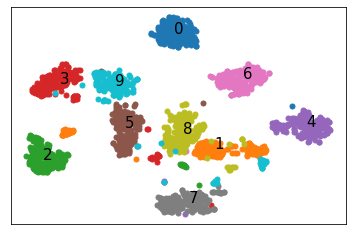

In [10]:
import numpy as no
import matplotlib.pyplot as plt
# removing the x and y ticks
plt.xticks([], [])
plt.yticks([], [])
# create a for loop from the unique value in ground_truth
for target in np.unique(ground_truth):
    # return a True if the ground_truth is equal to each of 
    # target entry value
    selection = ground_truth==target
    # create the plotting according to the selection
    # and coordinate vary from 0 to 1
    X1, X2 = Tx[selection, 0], Tx[selection, 1]
    # create a cordinate from the median of axises from each entry
    c1, c2 = np.median(X1), np.median(X2)
    # plot the the coordinate, ms para. is marker size
    plt.plot(X1, X2, 'o', ms=5)
    # plot the target value in each 'region' of number
    plt.text(c1, c2, target, fontsize=15)

           

#  Understanding Some Applications

## » Recognizing faces with PCA

### • importing the face image

In [11]:
from sklearn.datasets import fetch_olivetti_faces
# shuffle para. used to suffle the order of the dataset
# random_state para. determines random number generation 
# for the shuffling
dataset = fetch_olivetti_faces(shuffle=True, random_state=101)
# creating 2 dataset
# the train one is the one you already know abaut its label
train_faces = dataset.data[:350,:]
# this one you dont know
test_faces = dataset.data[350:,:]
# the array of which label attached to the pics
train_answers = dataset.target[:350]
# the answer of label from the unknown pics
test_answers = dataset.target[350:]


### • transforms and reduces the image using a PCA algorithm with Scikit-learn

In [12]:
from sklearn.decomposition import PCA
# define the number of components you want to take
n_components = 25
# svd_solver para. determines what kind of solver you use
# n_components para. determines how many components you want to use
# whiten para. used to remove some constant noise 
# (created by textual and photo granularity) from images
Rpca = PCA(svd_solver='randomized',
           n_components=n_components,
           whiten=True)
# train the model using train_faces datasets
Rpca.fit(train_faces)
# the sum of the first 25 components used
var_ratio = np.sum(Rpca.explained_variance_ratio_)
print(f"Explained variance by {n_components} components: {var_ratio}")
# transform the faces data with the number componenent from the PCA
compressed_train_faces = Rpca.transform(train_faces)
compressed_test_faces = Rpca.transform(test_faces)
# the result shows that almost 80% of the information from the
# datasets contained by 25 components

Explained variance by 25 components: 0.7944227457046509


### • represent subject number 34, whose photo number 17 has been chosen as the test set

The represented person is subject 34


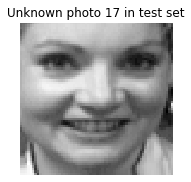

In [13]:
import  matplotlib.pyplot as plt
%matplotlib inline
# choose a photo number
photo = 17
# find the answer feature from entry 17 in the test data
print(f"The represented person is subject {test_answers[17]}")
# add a sublot to make the figure looks better
plt.subplot(1, 2, 1)
# get rid off the axis
plt.axis('off')
plt.title('Unknown photo '+str(photo)+' in test set')
# plotting the image
# cmap para. determines the color of the map
# interpolation determines the way of the interpolation (duh...)
plt.imshow(test_faces[photo].reshape(64,64), 
           cmap=plt.cm.gray, interpolation='nearest')
plt.show()

### • return the code number of the most resembling person in the dataset

In [14]:
# gets all of the each 25 value from the 17th entry in the compressed_
# test_face
mask = compressed_test_faces[photo,]
# sums the difference between every entry's values from compressed_
# train_faces and the mask to acquire the error
# and square it to remove the negative number
# axis=1 is to take only the value of each entry to be subtracted
# by the mask
squared_errors = np.sum((compressed_train_faces - mask)**2, axis=1)
# argmin() will find the smallest number in the array
minimum_error_face = np.argmin(squared_errors)
# lists every entry in the squared_errors where its values < 20
most_resembling = list(np.where(squared_errors < 20)[0])
print(f'''Best resembling subject in training set: {train_answers[minimum_error_face]}''')

Best resembling subject in training set: 34


### • displaying the test photo with the top three images that resemble it from the train set

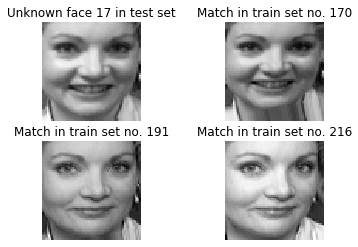

In [15]:
import matplotlib.pyplot as plt
# place the plot in the right position
plt.subplot(2, 2, 1)
plt.axis('off')
plt.title(f'Unknown face {str(photo)} in test set')
plt.imshow(test_faces[photo].reshape(64,64),
           cmap=plt.cm.gray, interpolation='nearest')
# makes a for loop with k as the index and m as the value from
# most_resembling list
for k,m in enumerate(most_resembling[:3]):
    # places each new plot apart from each other
    plt.subplot(2, 2, 2+k)
    plt.title(f'Match in train set no. {str(m)}')
    plt.axis('off')
    plt.imshow(train_faces[m].reshape(64,64),
               cmap=plt.cm.gray, interpolation='nearest')
plt.show()

## » Extracting topics with NMF

### • importing 20newsgroups dataset

In [16]:
from sklearn.datasets import fetch_20newsgroups
# choose a class of dataset 'misc. forsale' and removes its 
# headers, footers, and quotes
dataset = fetch_20newsgroups(shuffle=True, categories=['misc.forsale'],
                             remove=('headers', 'footers', 'quotes'), 
                             random_state=101)
print(f'Posts: {len(dataset.data)}')

Posts: 585


### • removing stop words using TfidfVectorizer()

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
# creates a vectorizer using TfidfVectorizer
# max_df para. represents a proportion of documents
# min_df para. will not count the word's count below 2
# stop_words para. determines which kind of stop_word discarded
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                             stop_words='english')
# get all the wards without the stop_words
tfidf = vectorizer.fit_transform(dataset.data)
# creates a variable consist of a number of desired components
n_topics = 5
# creating the matrix which consist of the components
# from the fitted words from the vectorizer
nmf = NMF(n_components=n_topics, 
          random_state=101).fit(tfidf)

### • Script outputs the resulting five components (topic)

In [18]:
# get all the words from the fitted vectorizer
feature_names = vectorizer.get_feature_names()
# set the number of most frequent words you want to appear
n_top_words = 15
# creating the for loop 
# topic_idx is the index of each component (topic)
# topic is all of the number of words that appear in a particular 
# topic
for topic_idx, topic in enumerate(nmf.components_):
    # shows the index of the topic
    print(f'topics {topic_idx+1}')
    # assign the top 15 most frequent words with descending order
    topics = topic.argsort()[:-n_top_words - 1:-1]
    # print each word from the index calculated earlier
    print(' '.join([feature_names[i] for i in topics]))

topics 1
condition excellent asking offer best car old new sale 10 miles 000 tape cd power
topics 2
00 50 dos 20 10 15 cover 1st new 25 price man 40 shipping comics
topics 3
drive hard card floppy monitor meg ram disk motherboard vga modem brand scsi color internal
topics 4
email looking game games send interested mail thanks like edu good want package price list
topics 5
shipping vcr works stereo obo included amp plus great volume unc mathes gibbs radley remotes


## » recommending movies

### • discovering python working directory

In [19]:
import os
print(os.getcwd())

C:\Users\aco\P4DS4D2


### • Import the necessary database 

In [20]:
import pandas as pd
from scipy.sparse import csr_matrix
# reads the all of the data and turns it into a 
users = pd.read_table('dataset_toy/ml-1m/users.dat', sep='::',
                      header=None, names=['user_id', 'gender',
                      'age', 'occupation', 'zip'], engine='python')
ratings = pd.read_table('dataset_toy/ml-1m/ratings.dat', sep='::',
                      header=None, names=['user_id', 'movie_id',
                      'rating', 'timestamp'], engine='python')
movies = pd.read_table('dataset_toy/ml-1m/movies.dat', sep='::',
                      header=None, names=['movie_id', 'title',
                      'genres'], engine='python')
# concat all of the dataframe into one
MovieLens = pd.merge(pd.merge(ratings, users), movies)
MovieLens.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


### • creates pivot table about users and movie titles

In [21]:
# creates a pivot table between user_id and title with rating
# as its aggregate value
# and fill a None/NaN with -
ratings_mtx_df = MovieLens.pivot_table(values='rating', 
                 index='user_id', columns='title', fill_value=0)
# list all of the movie titles
movie_index = ratings_mtx_df.columns
ratings_mtx_df.describe()

title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj誡lighetens kjere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
count,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,...,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000,6040.000000
mean,0.018543,0.039073,0.023179,0.146026,0.122351,0.000828,0.396689,0.336424,0.183609,0.438079,...,0.047517,0.212748,0.005464,0.060927,0.001159,0.016391,0.186921,0.001159,0.009603,0.221026
std,0.250822,0.380163,0.265832,0.682039,0.681721,0.046390,1.146319,1.089502,0.773525,1.325664,...,0.422375,0.851989,0.142611,0.474133,0.069288,0.246646,0.848712,0.064331,0.169471,0.874652
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000


### • apply TruncatedSVD algorithm to the pivot table

In [31]:
from sklearn.decomposition import TruncatedSVD
# build a TruncatedSVD algorithm as a transformer
# n_components para. determines the sum of your components
recom = TruncatedSVD(n_components=15, random_state=101)
# apply the algorithm to the pivot table earlier but it was
# transpoesed first to place the movies as the rows and the
# "user ratings" as the columns
R = recom.fit_transform(ratings_mtx_df.values.T)

### • looking for a specific movie

In [38]:
# choose a certain movie
movie = 'Star Wars: Episode V - The Empire Strikes Back (1980)'
# discover the index of the chosen movie
movie_idx = list(movie_index).index(movie)
print(movie_idx)
# shows the 10 components value from the chosen movie
# it acts as the movie profile
print(R[movie_idx])

3154
[184.72254552 -17.77612872  47.33450866  51.4664494   47.92058216
  17.65033116  14.3574635  -12.82219207  17.51347857   5.46888807
   7.5430805   -0.57117869 -30.74032355   2.4088565  -22.50368497]


### • find a similar movie by calculates the correlation

In [45]:
import numpy as np
# creates the corr. matrix from the already transformed dataframe
correlation_matrix = np.corrcoef(R)
# lists all of the correlation between the chosen movie and
# the other movies
P = correlation_matrix[movie_idx]
# shows all of the movie titles with a corr higher than 0.975
print(list(movie_index[(P > 0.975) & (P < 1.0)]))

['Star Wars: Episode IV - A New Hope (1977)', 'Star Wars: Episode VI - Return of the Jedi (1983)']
